# Prepared Dataset

In [1]:

!wget https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz

--2024-06-05 14:33:05--  https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz
Resolving www.dcc.fc.up.pt (www.dcc.fc.up.pt)... 193.136.39.12
Connecting to www.dcc.fc.up.pt (www.dcc.fc.up.pt)|193.136.39.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 441963 (432K) [application/x-gzip]
Saving to: ‘cal_housing.tgz’

cal_housing.tgz     100%[===================>] 431.60K   715KB/s    in 0.6s    

2024-06-05 14:33:07 (715 KB/s) - ‘cal_housing.tgz’ saved [441963/441963]



In [2]:
import numpy as np
import os
import tarfile
import joblib
from sklearn.datasets._base import _pkl_filepath, get_data_home

archive_path = "cal_housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6)

# Import dataset

In [3]:
# import dataset
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target




# Exploratory Data Analysis

In [4]:
def EDA(dataset, option):
  print("================= Exploratory Data Analysis =================")
  print("\n5 rows dataset:", dataset.head())
  print("=============================================================")
  print("\nSum of total columns:", len(dataset.columns))
  print("=============================================================")
  print("\ndataset info:", dataset.info())
  print("=============================================================")
  print("\nDescribe of data:", dataset.describe())
  print("=============================================================")

  return dataset

EDA(data,False)

================= Exploratory Data Analysis =================

5 rows dataset:    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Sum of total columns: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  fl

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
import seaborn as sns

In [6]:
corr=data.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
PRICE,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0.5, 1.0, 'Correlation of features')

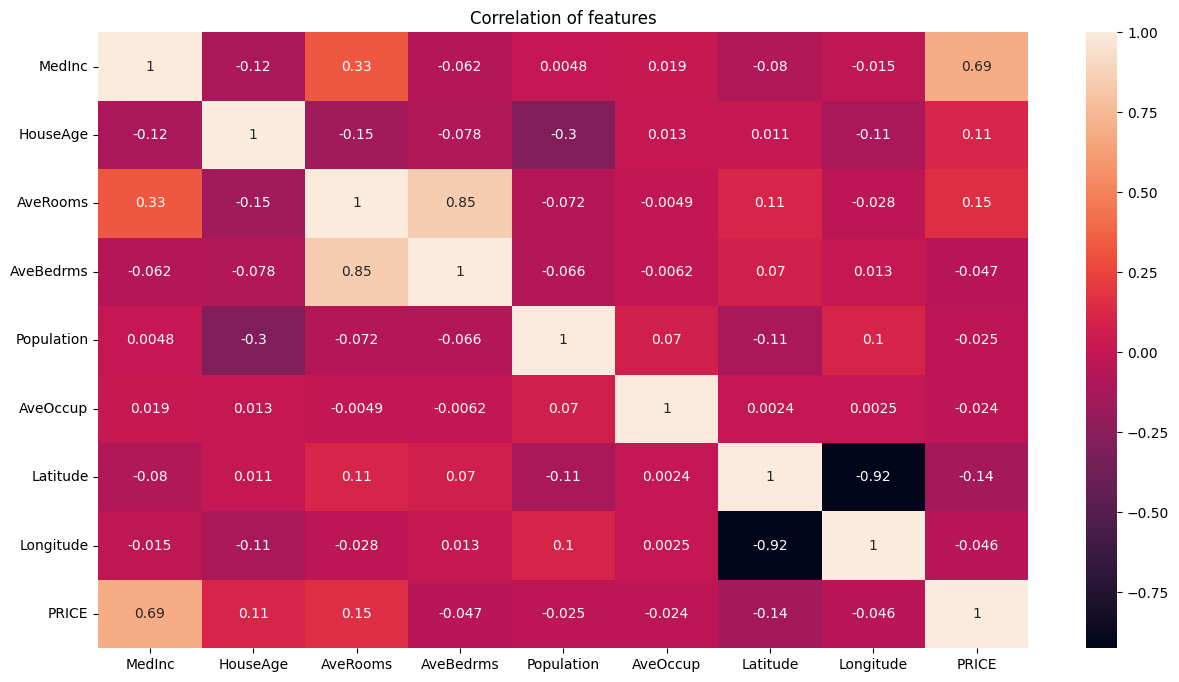

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
plt.title("Correlation of features")

1. Very Weak Correlation:
 *   **Positive**: Correlation coefficients between 0 and 0.2
 *   **List item**: Correlation coefficients between 0 and -0.2
 * **Example**: The Correlation between Population and "Price" is **-0.024650**, indicating a very weak negative correlation. This means there's almost no linear relationship, and as "population" changes, "Price" doesn't change in a predictable linear manner.

2. Weak Correlation:
 *   **Positive**: Correlation coefficients between 0.2 and 0.4
 *   **List item**: Correlation coefficients between -0.2 and -0.4
 * **Example**: Example: The correlation between AveRooms and PRICE is **0.151948**, which falls in the very weak positive correlation range but close to weak. This suggests a slight tendency for PRICE to increase as AveRooms increases.

2. Moderate Correlation:

 * **Positive**: Correlation coefficients between 0.4 and 0.6.
 * **Negative**: Correlation coefficients between -0.4 and -0.6.
 * Example: Not present in your matrix, but if the correlation between MedInc and PRICE were around 0.5, it would indicate a moderate positive correlation.

3. Strong Correlation:
 * Positive: Correlation coefficients between 0.6 and 0.8.
 * Negative: Correlation coefficients between -0.6 and -0.8.
 * Example: The correlation between MedInc and PRICE is 0.688075, indicating a strong positive correlation. This means that PRICE tends to increase significantly as MedInc increases.

4. Very Strong Correlation:
 * Positive: Correlation coefficients between 0.8 and 1.
 * Negative: Correlation coefficients between -0.8 and -1.
 * Example: The correlation between AveRooms and AveBedrms is 0.847621, indicating a very strong positive correlation. This means that as AveRooms increases, AveBedrms also increases in a very predictable linear manner.
Another example is the correlation between Latitude and Longitude at -0.924664, indicating a very strong negative correlation.


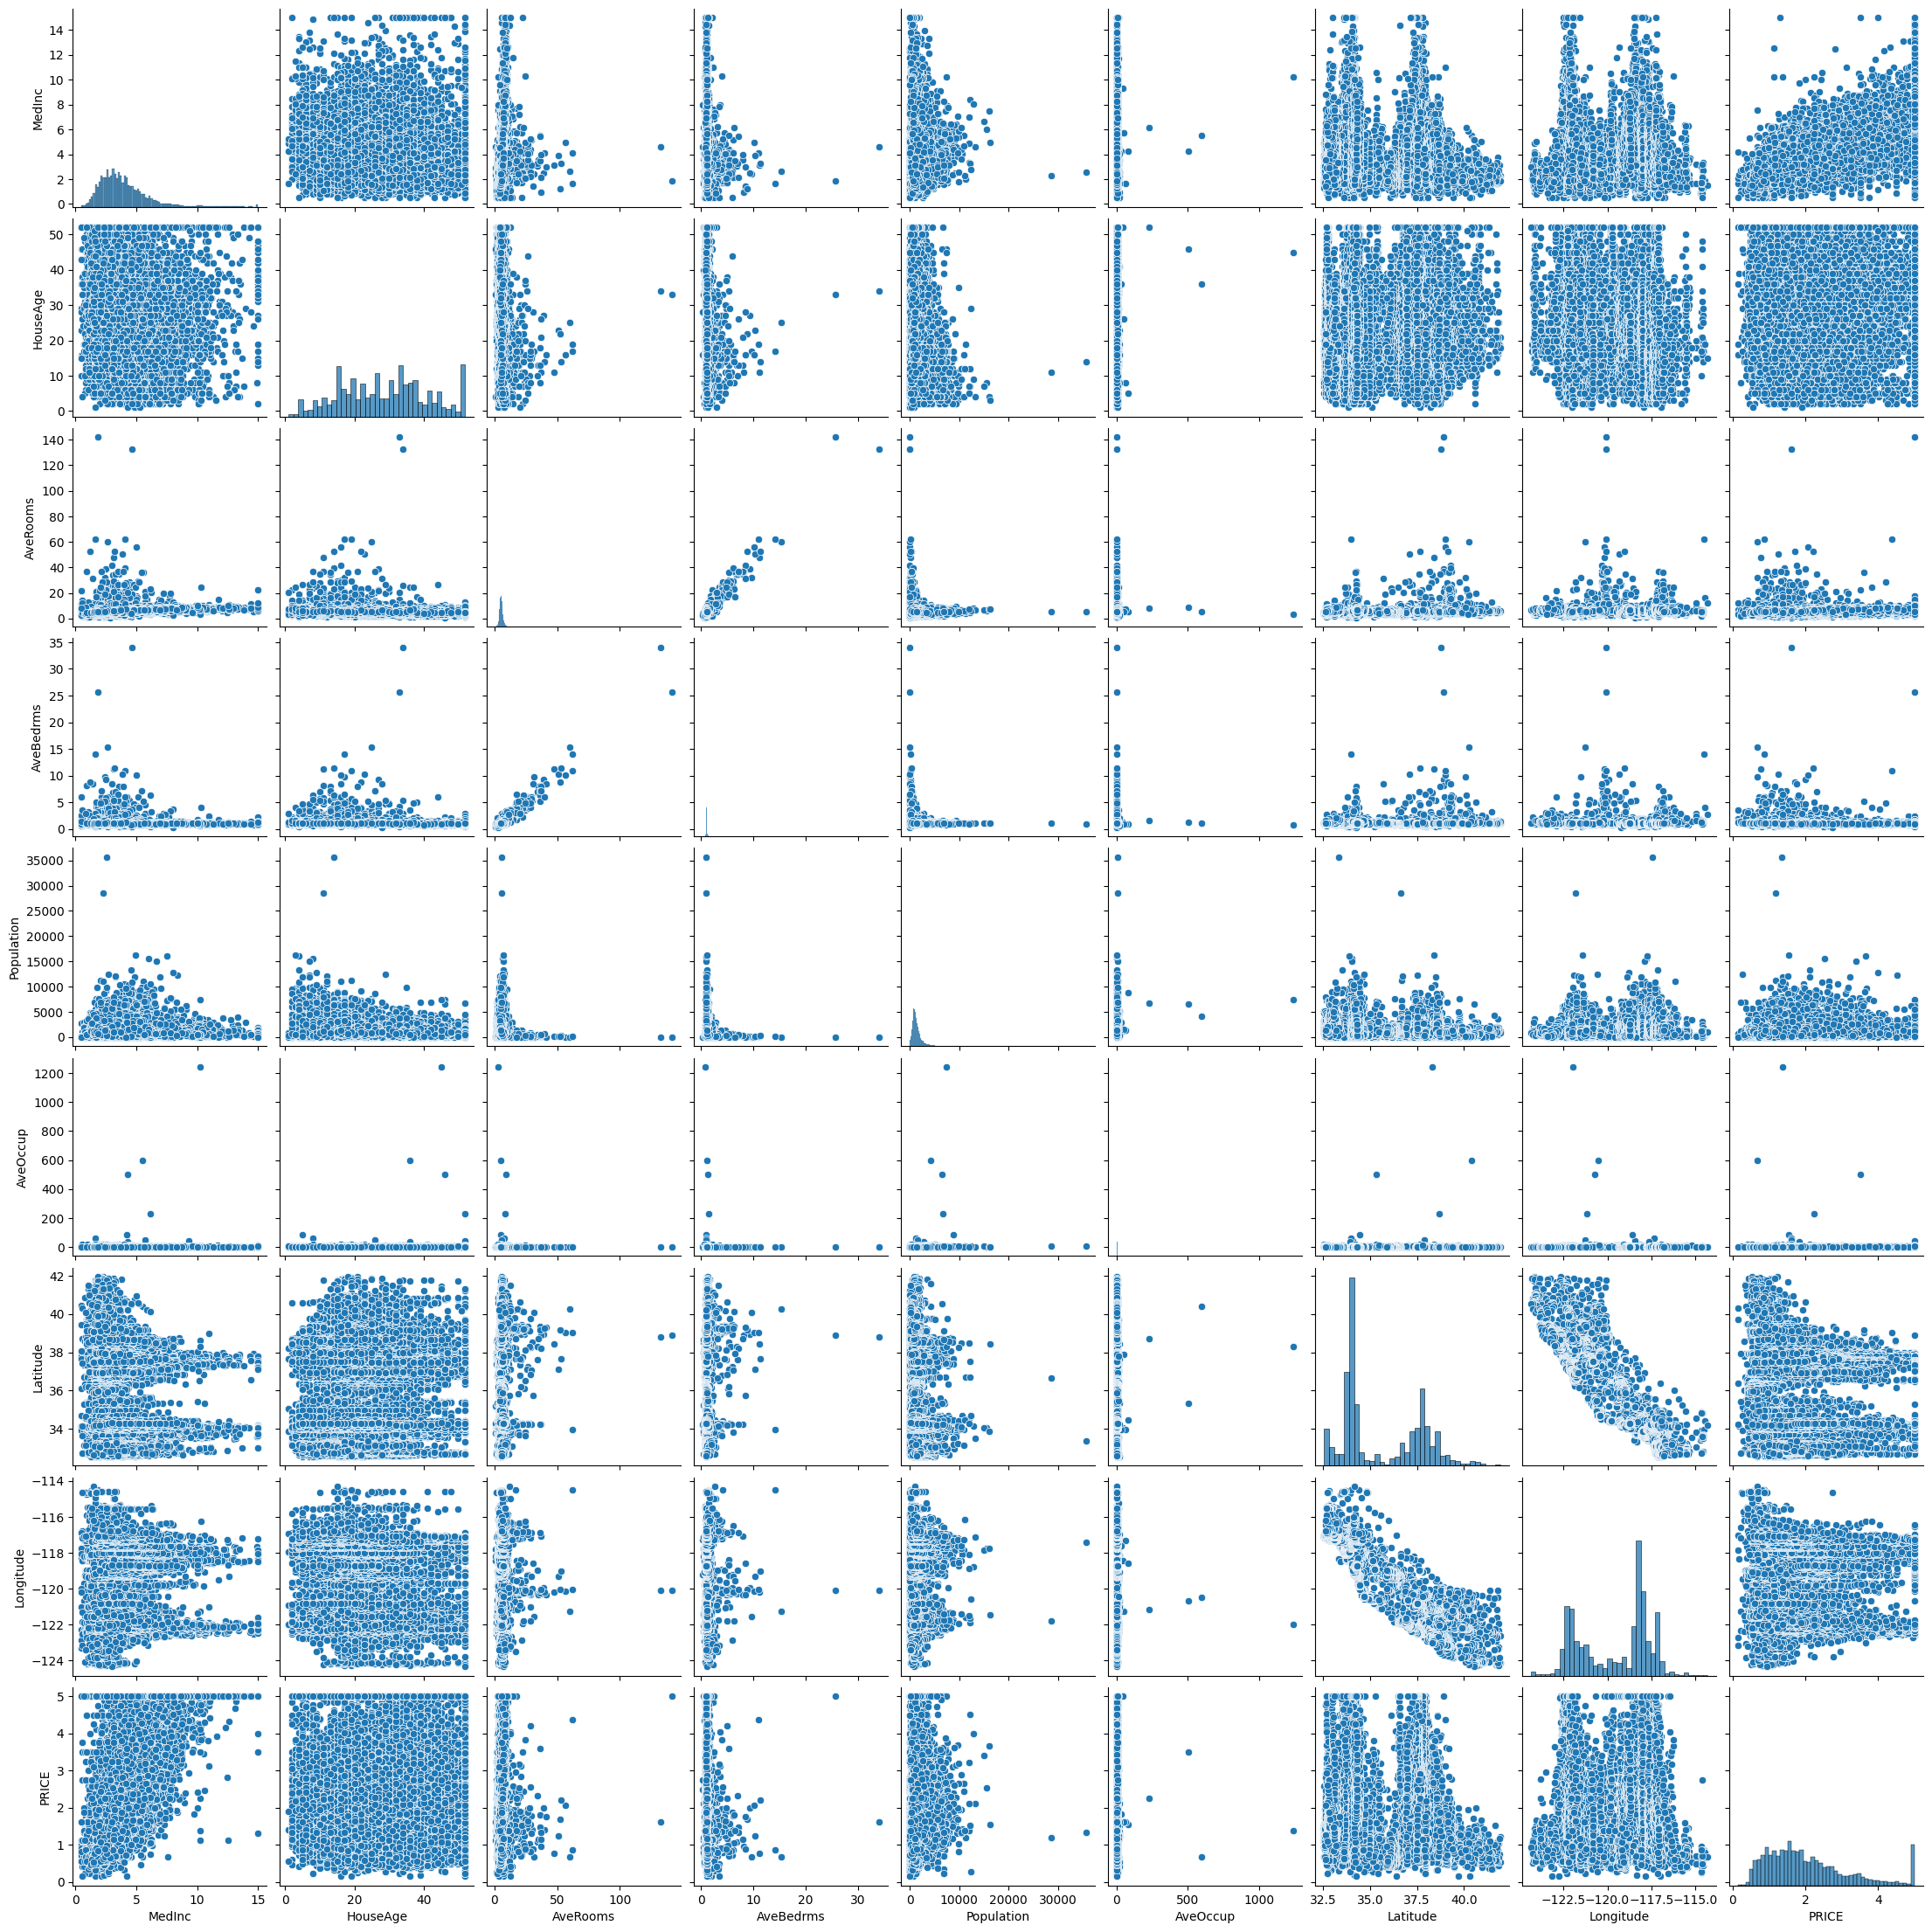

In [8]:
sns.pairplot(data)

In [8]:
X = data.drop("PRICE", axis=1)
y = data["PRICE"]


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib
X_train,X_test,y_train,y_test

model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model,"model.pkl")

['model.pkl']

In [11]:
import joblib
from sklearn.metrics import mean_squared_error, r2_score


model = joblib.load("model.pkl")

y_pred=model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r_score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'\nR^2={r_score}\nMean Square Error={mse}\nRoot Mean Square Error={rmse}.')


R^2=0.6040223431811123
Mean Square Error=0.5239648046438252
Root Mean Square Error=0.7238541321591148.


In [12]:
with open('metrics.txt','w') as outfile:
  outfile.write(f'\nR^2={r_score}\nMean Square Error={mse}\nRoot Mean Square Error={rmse}.')

In [13]:
X_test

array([[-1.14772246, -0.3014276 , -0.46356103, ...,  0.56243986,
         0.22075674,  0.2580042 ],
       [-0.69738315,  0.09834786, -0.14086589, ..., -0.17390163,
        -0.20888265,  0.0337006 ],
       [-0.19475766,  1.85735988, -0.54547279, ..., -0.98514082,
         1.03333558, -1.45168768],
       ...,
       [-0.8905295 ,  0.6580335 , -0.81401097, ...,  0.99709137,
        -0.7319219 ,  0.63184353],
       [ 1.60998996, -1.82057434,  0.75159184, ..., -0.2669435 ,
         1.3649051 , -0.76382331],
       [ 1.47501001,  0.57807841,  0.12396128, ..., -0.26102917,
        -0.79263181,  0.56206019]])

In [14]:
y_train_pred=model.predict(X_train)


# Visulization the results

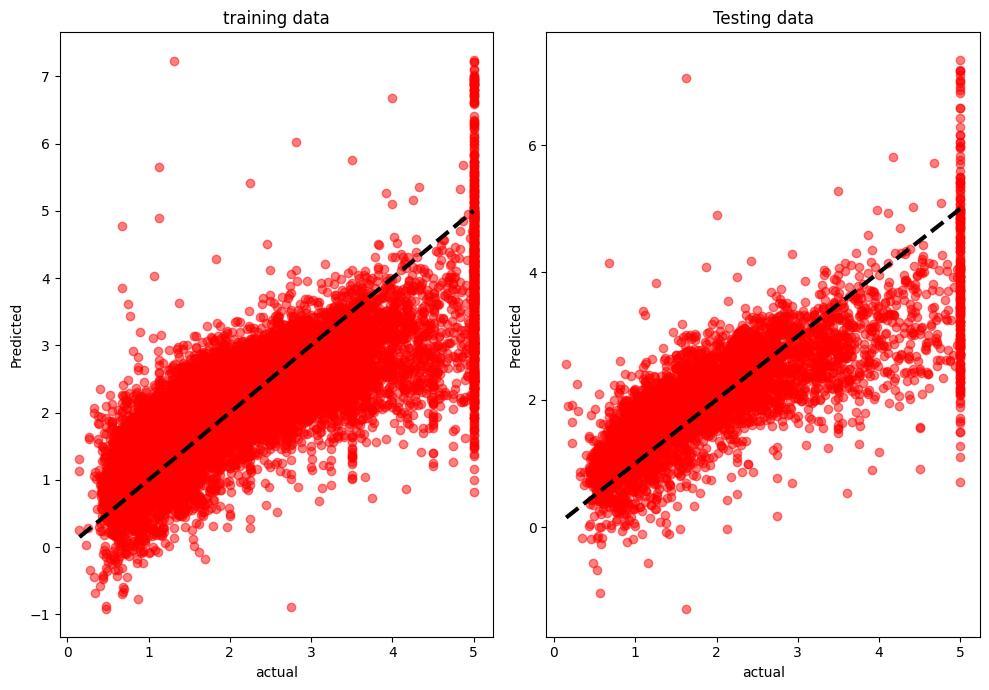

In [15]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.scatter(y_train, y_train_pred, color='red', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(),y_train.max()], 'k--',lw=3)
plt.xlabel("actual")
plt.ylabel("Predicted")
plt.title("training data")
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(),y_test.max()], 'k--',lw=3)
plt.xlabel("actual")
plt.ylabel("Predicted")
plt.title("Testing data")
plt.tight_layout()
plt.show()

# Investigate the Outliers

In [16]:
def identify_outliers_columns(df):
    outliers = pd.DataFrame(columns=df.columns)
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers_in_column = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        outliers = pd.concat([outliers, outliers_in_column])
    return outliers.drop_duplicates()

In [20]:
outliers_colums=identify_outliers_columns(data)

In [21]:
print(f"Number of outliers found: {outliers_colums.shape[0]}")
print(outliers_colums)

Number of outliers found: 4328
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1       8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
134     8.2049      28.0  6.978947   0.968421       463.0  2.436842     37.83   
135     8.4010      26.0  7.530806   1.056872       542.0  2.568720     37.83   
...        ...       ...       ...        ...         ...       ...       ...   
20322   2.5714       8.0  3.037500   0.937500       102.0  1.275000     34.23   
20325   4.5833      21.0  7.278431   1.082353       863.0  3.384314     34.28   
20326   6.9070      16.0  6.644540   1.032120      1567.0  3.355460     34.30   
20422   5.1457      35.0  6.958333   1.217593       576.0  2.666667     34.14   
20443   3.3438      50.0  5.342857   0.942857       130.0  3.714286     34.27 

In [17]:
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
df_train = pd.DataFrame(X_train, columns=columns)
df_train['PRICE'] = y_train

df_test = pd.DataFrame(X_test, columns=columns)
df_test['PRICE'] = y_test


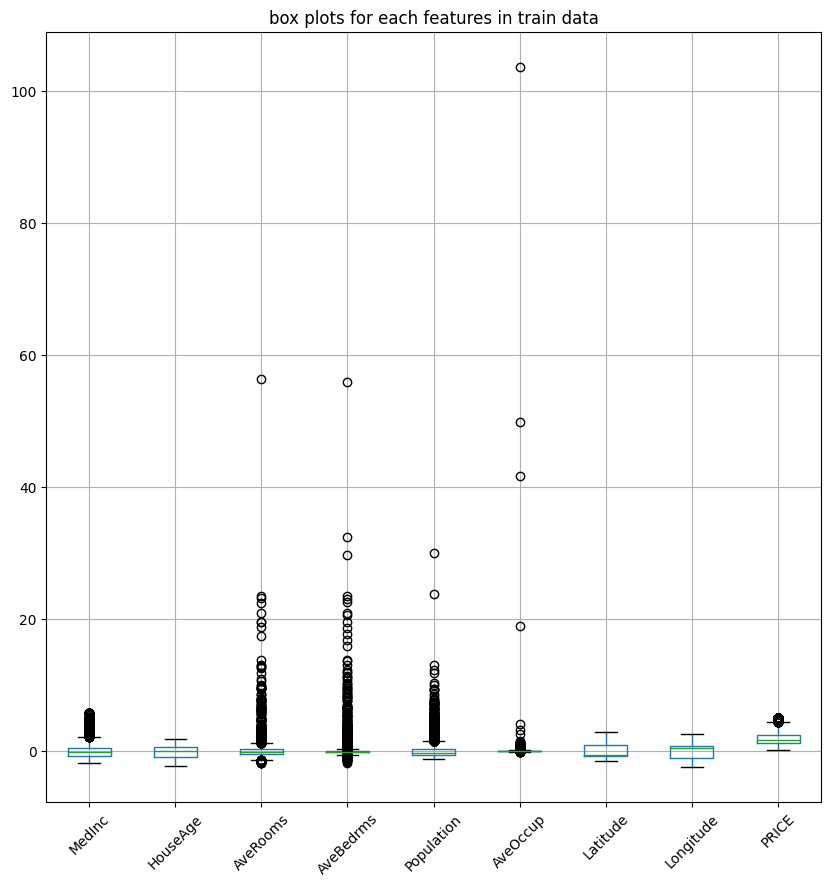

In [18]:
plt.figure(figsize=(10,10))
df_train.boxplot()
plt.xticks(rotation=45)
plt.title("box plots for each features in train data")
plt.show()

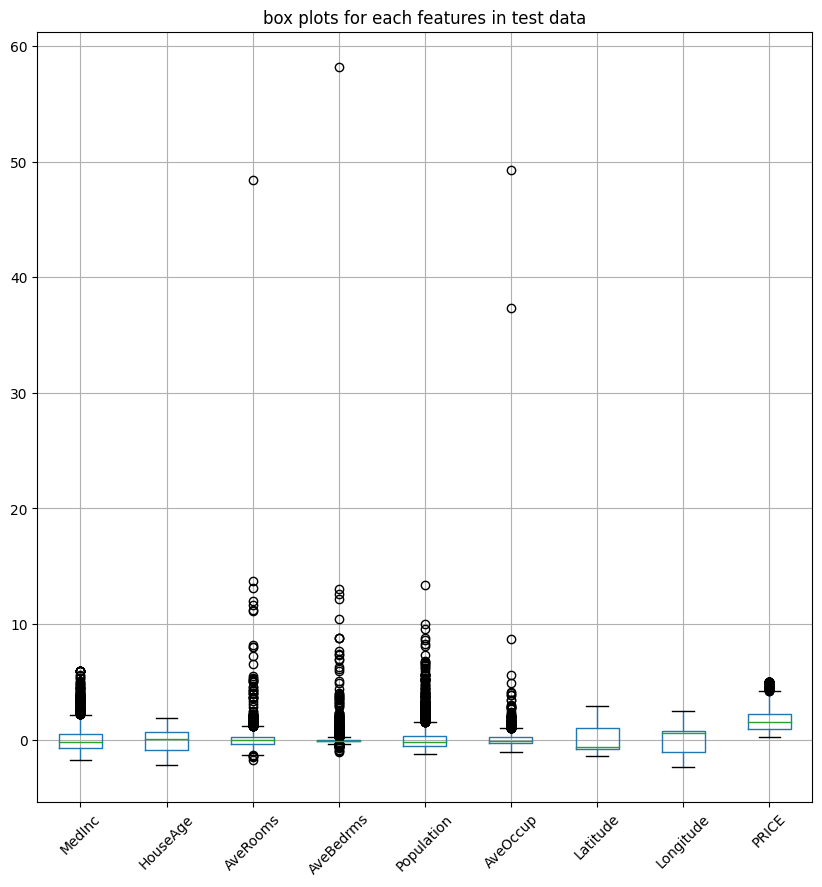

In [19]:
plt.figure(figsize=(10,10))
df_test.boxplot()
plt.xticks(rotation=45)
plt.title("box plots for each features in test data")
plt.show()

# Clean train data outliers

In [20]:
outliers_train = identify_outliers_columns(df_train)
print(f'Number of outliers found: {outliers_train.shape[0]}')
print(outliers_train)

Number of outliers found: 3401
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
8      2.449819 -0.205853  0.371595  -0.261179    0.813289 -0.010298   
77     2.243277 -0.840224  0.481183  -0.217687    0.180684 -0.073649   
96     2.371552 -1.553891  0.806378   0.074723    2.255242 -0.023776   
113    3.384985  0.269925  0.992413  -0.177204    0.587546 -0.020005   
127    3.230604 -0.523038  1.454453   0.073272    0.127311  0.005413   
...         ...       ...       ...        ...         ...       ...   
15246  0.012862 -0.285149  0.014606  -0.250198   -0.867532 -0.024571   
15288  0.216358  0.825000  0.098053  -0.321015   -0.161430 -0.061059   
15297  0.727828 -0.047260  0.242758  -0.215933   -0.066058 -0.018730   
15303 -1.331028  0.269925 -0.787485  -0.345424   -0.000435  0.050980   
15311 -1.155583 -0.998816 -0.219362   0.053734    1.486142 -0.009881   

       Latitude  Longitude    PRICE  
8     -0.874800   0.591165  2.26700  
77     1.051268  -1.296591  

In [21]:
df_train_cleaned = df_train.drop(outliers_train.index)
df_train_cleaned = df_train.dropna()
print(df_train_cleaned)
print(f"Number of outliers found: {outliers_train.shape[0]}")


         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
1      0.771374  1.062889  0.383521  -0.020378   -0.411672 -0.058729   
2      0.021424  0.587111  0.278523  -0.084625   -0.626915 -0.072838   
4     -0.793136 -0.919520 -0.264184  -0.139881   -0.631290 -0.085141   
5     -0.021964 -0.364446 -0.145968  -0.182258   -0.215678 -0.021246   
7     -1.306760  0.745703 -0.013112  -0.089311   -1.116899 -0.016964   
...         ...       ...       ...        ...         ...       ...   
15474 -0.056476  0.428518 -0.040956  -0.220792   -0.075683  0.086340   
15475  1.308847  0.507814  0.286357  -0.388828   -0.673288 -0.006223   
15476 -0.435101  0.349222  0.591764   0.393370    0.284806  0.066712   
15477 -0.495824  0.587111 -0.598322  -0.039164    0.287431  0.018854   
15478  0.966991 -1.078113  0.396334  -0.065869    0.305805  0.006042   

       Latitude  Longitude  PRICE  
1      0.709168  -1.196710  3.585  
2      1.313701  -1.551288  3.521  
4      1.369936  -0.872096 

In [22]:
X_train_cleaned = df_train_cleaned.drop(columns=['PRICE']).values
y_train_cleaned = df_train_cleaned['PRICE'].values
print("before clean", X_train.shape[0])
print("after clean", X_train_cleaned.shape[0])
print("before clean", y_train.shape[0])
print("after clean", y_train_cleaned.shape[0])

before clean 15480
after clean 11599
before clean 15480
after clean 11599


# Clean test data outliers

In [23]:
outliers_test = identify_outliers_columns(df_test)
print(f'Number of outliers found: {outliers_test.shape[0]}')
print(outliers_test)

Number of outliers found: 990
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
9     2.259621  1.297674  0.559872  -0.148782   -0.432932 -0.111241 -0.657202   
101   3.099484 -1.820574  0.886865  -0.254481    0.340396  0.217304 -0.937402   
112   3.273083  1.857360  1.605812   1.154733   -1.256240 -0.399724 -0.078123   
131   5.907947  1.537540  1.308769  -0.067087   -0.810055  0.272866 -0.652532   
144   2.292889 -0.861113  0.484051  -0.082933    0.155015 -0.044103 -0.619842   
...        ...       ...       ...        ...         ...       ...       ...   
4680  1.002898 -0.781158  0.375626  -0.277019    0.213174 -0.002328 -1.119531   
4696 -0.791202  0.817944 -0.589475  -0.003033   -0.800967  0.258845 -0.741262   
4702  0.419115 -0.941068  0.098697  -0.108427   -0.836408 -0.302706 -0.769282   
4724 -0.905839  0.817944 -0.627509   0.039579   -0.036726 -0.741451 -0.848672   
4755 -0.211498  0.737989 -0.126727  -0.333654   -0.666475  0.483248 -0.797302  

In [24]:
df_test_cleaned = df_test.drop(outliers_test.index)
df_test_cleaned = df_test.dropna()
print(df_test_cleaned)
print(f"Number of outliers found: {outliers_test.shape[0]}")


        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0    -1.147722 -0.301428 -0.463561  -0.130268   -0.024913  0.562440  0.220757   
3     1.001150 -0.941068  0.287366  -0.133945    0.259519  0.296225 -0.610502   
6     0.654853  0.578078  0.309490  -0.001827   -0.681015  0.042443 -0.792632   
17    0.151963 -0.221473  0.082771   0.043129   -1.068134 -0.014069  0.883896   
19   -0.879511 -0.141517 -0.054099  -0.115700   -0.553793  0.079289  0.860546   
...        ...       ...       ...        ...         ...       ...       ...   
5135 -0.674657  0.258258 -0.783451   0.284445   -1.005431  0.011258  1.023996   
5139  2.102391  0.578078  0.746668   0.213117   -0.889114 -0.485852 -0.928062   
5140  0.150797  1.217719 -0.106699  -0.246511   -0.002195 -0.466597 -0.675882   
5144 -1.059519  0.817944 -0.661564   0.420243   -0.083980 -0.074455  1.033336   
5148 -0.129016 -0.061562 -0.642080  -0.512391   -0.812781  0.077218 -1.348361   

      Longitude  PRICE  
0 

In [25]:
X_test_cleaned = df_test_cleaned.drop(columns=['PRICE']).values
y_test_cleaned = df_test_cleaned['PRICE'].values
print("before clean", X_test.shape[0])
print("after clean", y_test_cleaned.shape[0])
print("before clean", y_test.shape[0])
print("after clean", y_test_cleaned.shape[0])

before clean 5160
after clean 1284
before clean 5160
after clean 1284


# Retrain clean data from outlier

In [26]:
model_cleaned = LinearRegression()
print(model_cleaned.fit(X_train_cleaned, y_train_cleaned))


LinearRegression()


In [27]:
joblib.dump(model_cleaned,"model_cleaned.pkl")

['model_cleaned.pkl']

In [28]:
y_train_pred_cleaned = model_cleaned.predict(X_train_cleaned)
print(y_train_pred_cleaned)
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)
print(y_pred_cleaned)

[1.98185698 1.98290201 1.98891208 ... 1.98995347 2.01675407 1.96963855]
[2.00935747 1.97984827 1.98627262 ... 1.99556698 2.02048712 2.00951592]


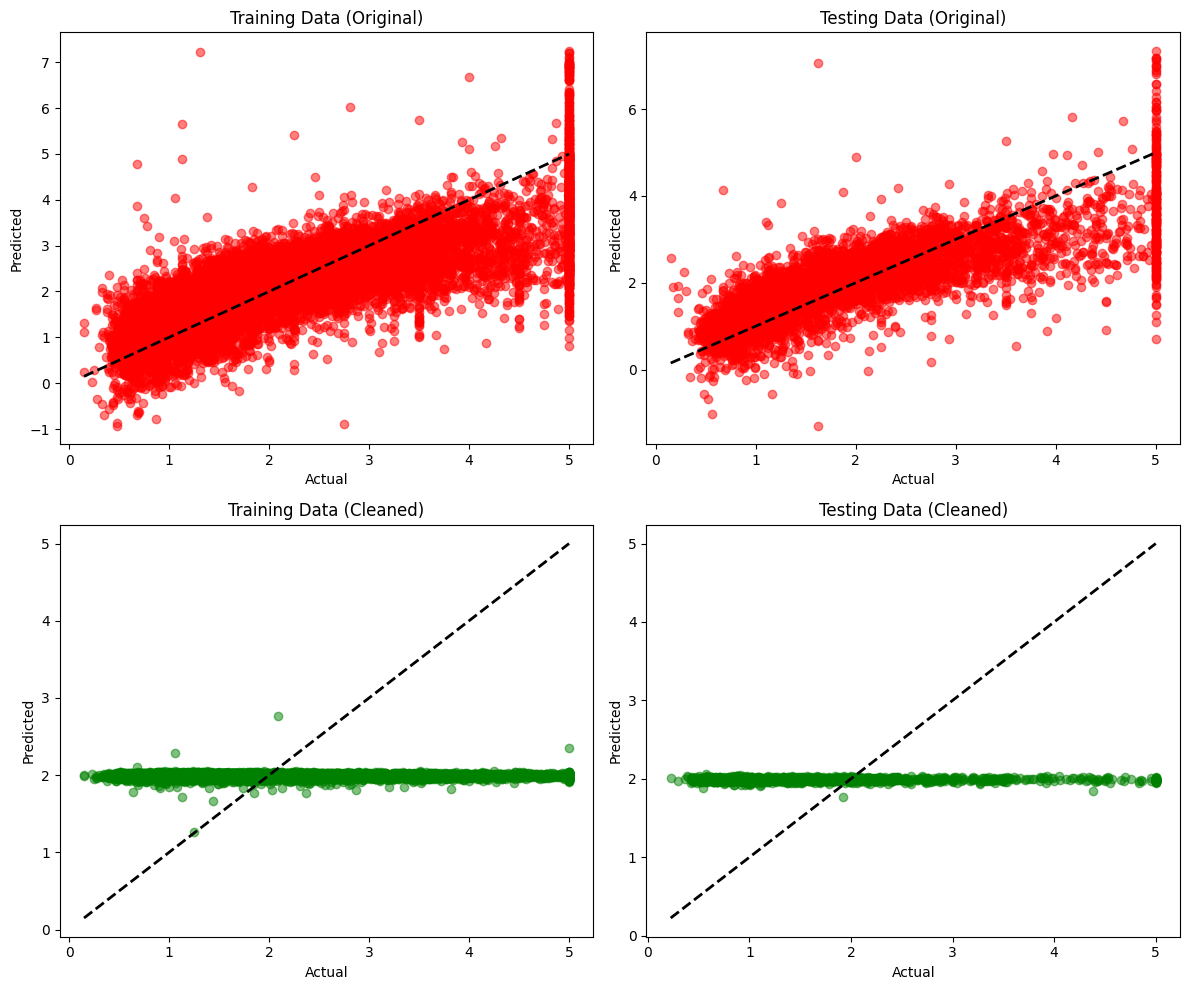

In [29]:
import matplotlib.pyplot as plt

# Assuming y_train, y_train_pred, y_test, y_pred, y_train_cleaned, y_train_pred_cleaned, y_test_cleaned, and y_pred_cleaned are defined

plt.figure(figsize=(12, 10))

# Original training data
plt.subplot(2, 2, 1)
plt.scatter(y_train, y_train_pred, color='red', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data (Original)')

# Original testing data
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data (Original)')

# Cleaned training data
plt.subplot(2, 2, 3)
plt.scatter(y_train_cleaned, y_train_pred_cleaned, color='green', alpha=0.5)
plt.plot([y_train_cleaned.min(), y_train_cleaned.max()], [y_train_cleaned.min(), y_train_cleaned.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data (Cleaned)')

# Cleaned testing data
plt.subplot(2, 2, 4)
plt.scatter(y_test_cleaned, y_pred_cleaned, color='green', alpha=0.5)
plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], [y_test_cleaned.min(), y_test_cleaned.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data (Cleaned)')


plt.tight_layout()
plt.show()


In [30]:
print("Before clean outliers:")
mse = mean_squared_error(y_test,y_pred)
r_score = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'R^2={r_score}\nMean Square Error={mse}\nRoot Mean Square Error={rmse}.')
with open('metrics.txt','w') as outfile:
  outfile.write(f'\nR^2={r_score}\nMean Square Error={mse}\nRoot Mean Square Error={rmse}.')

Before clean outliers:
R^2=0.6040223431811123
Mean Square Error=0.5239648046438252
Root Mean Square Error=0.7238541321591148.


In [31]:
print("after clean outliers:")

mse = mean_squared_error(y_test_cleaned ,y_pred_cleaned)
r_score = r2_score(y_test_cleaned ,y_pred_cleaned)
rmse = np.sqrt(mean_squared_error(y_test_cleaned ,y_pred_cleaned))
print(f'\nR^2={r_score}\nMean Square Error={mse}\nRoot Mean Square Error={rmse}.')
with open('metrics.txt','w') as outfile:
  outfile.write(f'\nR^2={r_score}\nMean Square Error={mse}\nRoot Mean Square Error={rmse}.')

after clean outliers:

R^2=-0.05224779435473015
Mean Square Error=1.235633553816045
Root Mean Square Error=1.1115905513344584.


# clean raw data outliers

In [35]:
def identify_outliers_columns(df):
    outliers = pd.DataFrame(columns=df.columns)
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers_in_column = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        outliers = pd.concat([outliers, outliers_in_column])
    return outliers.drop_duplicates()

df = data.copy()

outliers = identify_outliers_columns(df)
print(f'Number of outliers found: {outliers.shape[0]}')
print(outliers)
df_cleaned = df.drop(outliers.index)
df_cleaned = df.dropna()
print(df_cleaned)
print(f"Number of outliers found: {outliers.shape[0]}")

X_cleaned = df_cleaned.drop(columns=['PRICE']).values
y_cleaned = df_cleaned['PRICE'].values
print("before clean", df.shape[0])
print("after clean", df_cleaned.shape[0])
print("before clean", X.shape[0])
print("after clean", X_cleaned.shape[0])

Number of outliers found: 4328
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1       8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
134     8.2049      28.0  6.978947   0.968421       463.0  2.436842     37.83   
135     8.4010      26.0  7.530806   1.056872       542.0  2.568720     37.83   
...        ...       ...       ...        ...         ...       ...       ...   
20322   2.5714       8.0  3.037500   0.937500       102.0  1.275000     34.23   
20325   4.5833      21.0  7.278431   1.082353       863.0  3.384314     34.28   
20326   6.9070      16.0  6.644540   1.032120      1567.0  3.355460     34.30   
20422   5.1457      35.0  6.958333   1.217593       576.0  2.666667     34.14   
20443   3.3438      50.0  5.342857   0.942857       130.0  3.714286     34.27 

In [36]:
import pandas as pd

def identify_outliers_columns(df):
    outliers = pd.DataFrame(columns=df.columns)
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers_in_column = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        outliers = pd.concat([outliers, outliers_in_column])
    return outliers.drop_duplicates()

# Assuming 'data' DataFrame is defined

df = data.copy()

outliers = identify_outliers_columns(df)
print(f'Number of outliers found: {outliers.shape[0]}')
print(outliers)

df_cleaned = df.drop(outliers.index)
df_cleaned = df_cleaned.dropna()  # Corrected line: Drop NaN values from the cleaned DataFrame
print(df_cleaned)
print(f"Number of outliers found: {outliers.shape[0]}")

X_cleaned = df_cleaned.drop(columns=['PRICE']).values
y_cleaned = df_cleaned['PRICE'].values
print("before clean", df.shape[0])
print("after clean", df_cleaned.shape[0])
print("before clean", X.shape[0])
print("after clean", X_cleaned.shape[0])


Number of outliers found: 4328
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1       8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
134     8.2049      28.0  6.978947   0.968421       463.0  2.436842     37.83   
135     8.4010      26.0  7.530806   1.056872       542.0  2.568720     37.83   
...        ...       ...       ...        ...         ...       ...       ...   
20322   2.5714       8.0  3.037500   0.937500       102.0  1.275000     34.23   
20325   4.5833      21.0  7.278431   1.082353       863.0  3.384314     34.28   
20326   6.9070      16.0  6.644540   1.032120      1567.0  3.355460     34.30   
20422   5.1457      35.0  6.958333   1.217593       576.0  2.666667     34.14   
20443   3.3438      50.0  5.342857   0.942857       130.0  3.714286     34.27 

In [37]:
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_cleaned,y_cleaned, random_state=42)

scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new=scaler.fit_transform(X_test_new)

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)

joblib.dump(model_new,"model_new.pkl")

import joblib
from sklearn.metrics import mean_squared_error, r2_score


model_new = joblib.load("model_new.pkl")

y_pred_new=model_new.predict(X_test_new)
mse = mean_squared_error(y_test_new,y_pred_new)
r_score = r2_score(y_test_new,y_pred_new)
rmse = np.sqrt(mean_squared_error(y_test_new,y_pred_new))
print(f'\nR^2={r_score}\nMean Square Error={mse}\nRoot Mean Square Error={rmse}.')

with open('metrics.txt','w') as outfile:
  outfile.write(f'\nR^2={r_score}\nMean Square Error={mse}\nRoot Mean Square Error={rmse}.')


R^2=0.5093109598857145
Mean Square Error=0.4241877528105541
Root Mean Square Error=0.6512969774308446.


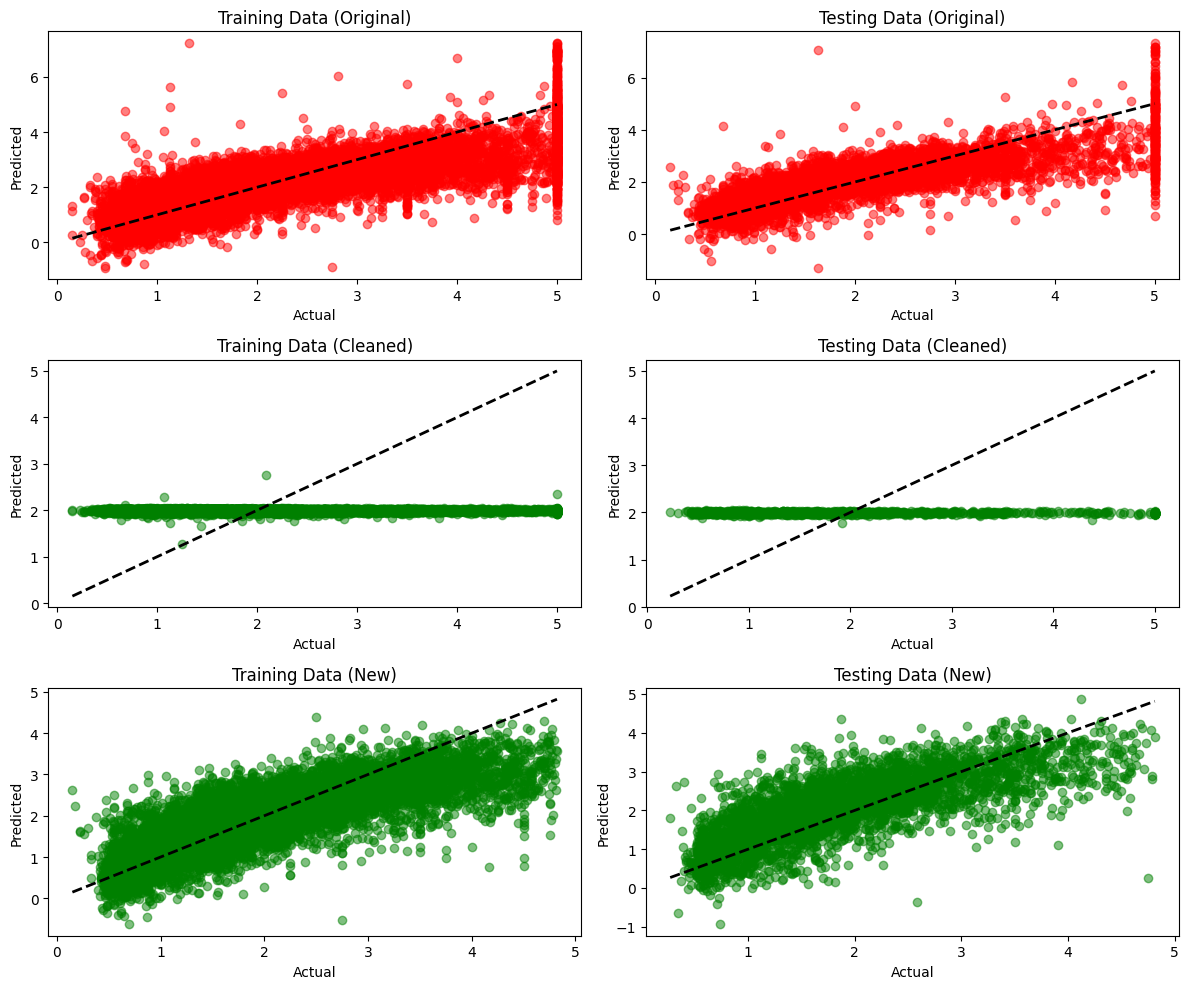

In [41]:
import matplotlib.pyplot as plt

# Assuming y_train, y_train_pred, y_test, y_pred, y_train_cleaned, y_train_pred_cleaned, y_test_cleaned, and y_pred_cleaned are defined
y_train_pred_new=model_new.predict(X_train_new)

plt.figure(figsize=(12, 10))

# Original training data
plt.subplot(3, 2, 1)
plt.scatter(y_train, y_train_pred, color='red', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data (Original)')

# Original testing data
plt.subplot(3, 2, 2)
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data (Original)')

# Cleaned training data
plt.subplot(3, 2, 3)
plt.scatter(y_train_cleaned, y_train_pred_cleaned, color='green', alpha=0.5)
plt.plot([y_train_cleaned.min(), y_train_cleaned.max()], [y_train_cleaned.min(), y_train_cleaned.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data (Cleaned)')

# Cleaned testing data
plt.subplot(3, 2, 4)
plt.scatter(y_test_cleaned, y_pred_cleaned, color='green', alpha=0.5)
plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], [y_test_cleaned.min(), y_test_cleaned.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data (Cleaned)')


# Cleaned raw training data
plt.subplot(3, 2, 5)
plt.scatter(y_train_new,y_train_pred_new, color='green', alpha=0.5)
plt.plot([y_train_new.min(), y_train_new.max()], [y_train_new.min(), y_train_new.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data (New)')

# Cleaned raw testing data
plt.subplot(3, 2, 6)
plt.scatter(y_test_new, y_pred_new, color='green', alpha=0.5)
plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data (New)')


plt.tight_layout()
plt.show()